# Diamonds

## About Dataset
### Context:
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Content:
|column |description|
|-------|-----------|
|price  |price in US dollars (\$326--\$18,823)|
|carat  |weight of the diamond (0.2--5.01)|
|cut    |quality of the cut (Fair, Good, Very Good, Premium, Ideal)|
|color  |diamond colour, from J (worst) to D (best)|
|clarity|a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|x      |length in mm (0--10.74)|
|y      |width in mm (0--58.9)|
|z      |depth in mm (0--31.8)|
|depth  |total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)|
|table  |width of top of diamond relative to widest point (43--95)|

### Import important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe().round(2)

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,26970.50,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,15571.28,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,1.00,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,13485.75,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,26970.50,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,40455.25,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,53940.00,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


In [6]:
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


## Data Preprocessing

### 1. Remove **unuseful** columns

In [7]:
df.drop(columns='Unnamed: 0', inplace=True)

### 2. Check **Duplicates**

In [8]:
df.duplicated().sum()

146

#### Remove **Duplicates**

In [9]:
df.drop_duplicates(inplace=True)

### 3. Check **Missing values**

In [10]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### There are **no** missing values

### 4. Check **Outliers**

In [11]:
numeric_colmns = df.select_dtypes(include='number').columns
numeric_colmns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [12]:
categoric_colmns = df.select_dtypes(include='object').columns
categoric_colmns

Index(['cut', 'color', 'clarity'], dtype='object')

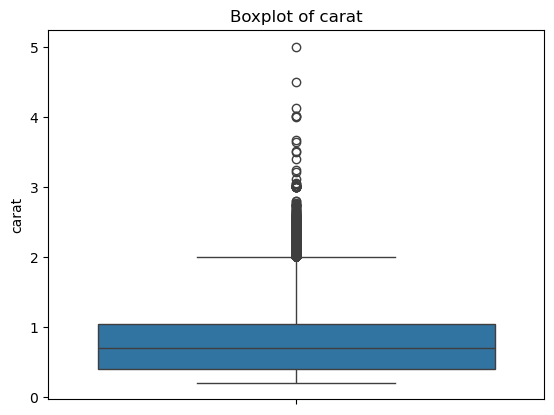

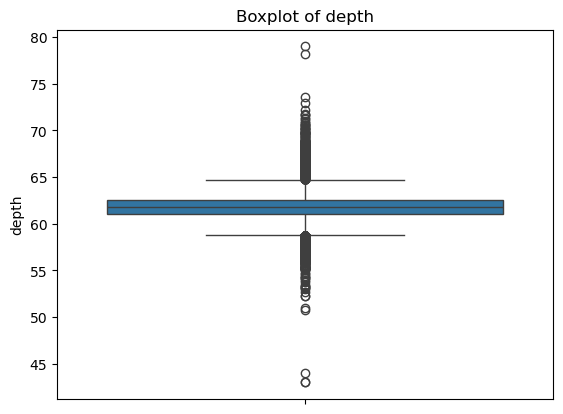

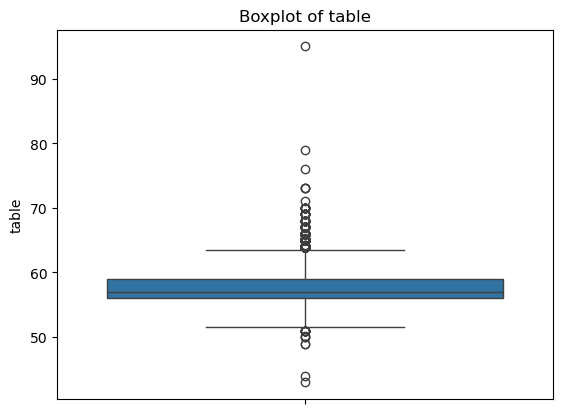

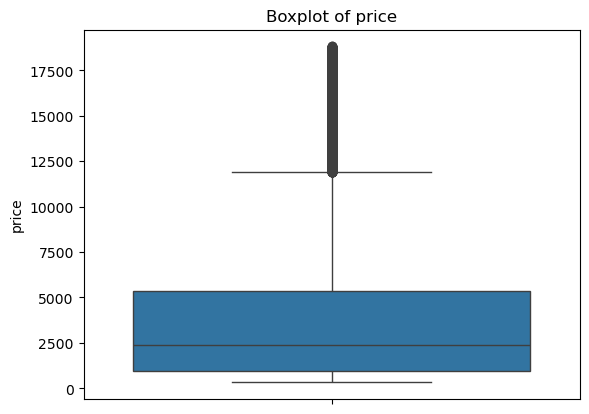

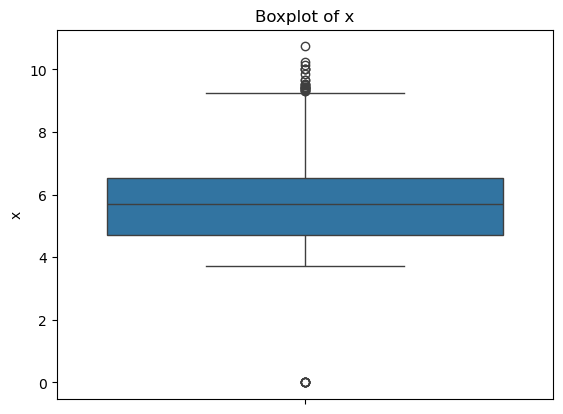

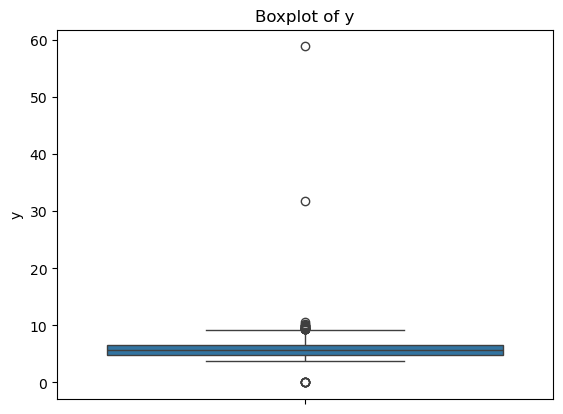

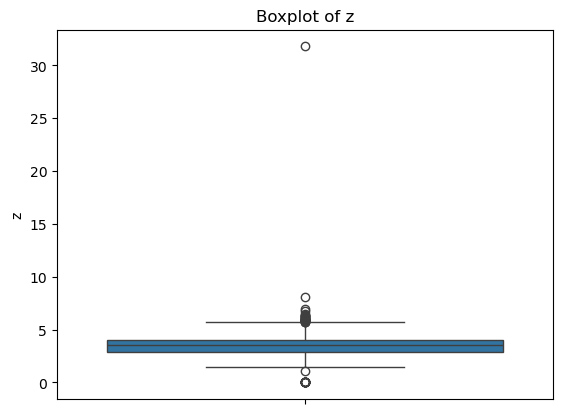

In [13]:
for col in numeric_colmns:
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Remove **Outliers**

In [14]:
for col in numeric_colmns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [15]:
# for col in numeric_colmns:
#     sns.boxplot(data=df, y=col)
#     plt.title(f'Boxplot of {col}')
#     plt.show()

In [16]:
df.shape

(46425, 10)

### 5. Check **Correlation**

<Axes: >

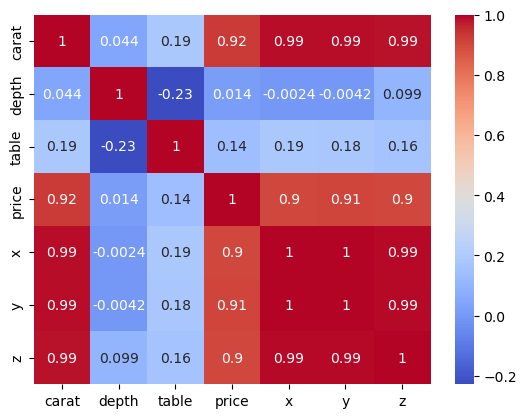

In [17]:
corr = df[numeric_colmns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Feature Engeeniring

### Feature Selection

#### Since **depth** column has **lower** correlation between Target (**price**) so will **Remove** it

In [18]:
df.drop(columns='depth', inplace=True)

### Encoding

In [19]:
for col in categoric_colmns:
    print(df[col].value_counts())
    print('-'*30)

cut
Ideal        20037
Premium      11716
Very Good    10734
Good          3671
Fair           267
Name: count, dtype: int64
------------------------------
color
G    9844
E    8723
F    8275
H    6962
D    6050
I    4373
J    2198
Name: count, dtype: int64
------------------------------
clarity
SI1     11245
VS2     10695
VS1      7240
SI2      7219
VVS2     4563
VVS1     3385
IF       1612
I1        466
Name: count, dtype: int64
------------------------------


In [20]:
df = pd.get_dummies(df, columns=categoric_colmns, drop_first=True)
df.columns

Index(['carat', 'table', 'price', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

### Splitting

In [21]:
X = df.drop(columns='price')
y = df['price']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

features_to_scale = [x for x in numeric_colmns if x not in ['depth','price']]

scaler = MinMaxScaler()
X_train_scale[features_to_scale] = scaler.fit_transform(X_train_scale[features_to_scale])
X_test_scale[features_to_scale] = scaler.transform(X_test_scale[features_to_scale])

## Modeling (Linear Regression)

### Training

In [24]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train_scale, y_train)

LinearRegression()

In [25]:
LR.coef_

array([19019.13717728,  -256.72364487, -5011.26318663,  2918.29882502,
       -3891.44941037,   275.6990832 ,   443.45268825,   398.34727467,
         348.15851034,  -164.32769317,  -208.63198683,  -322.15911359,
        -682.30267807, -1084.37297314, -1728.43049645,  3438.0286431 ,
        2350.18039958,  1639.1323981 ,  3072.31924226,  2807.0227279 ,
        3318.06399033,  3347.70984993])

In [26]:
y_pred = LR.predict(X_test_scale)
y_test.head(5), y_pred[0:5]

(21681    9784
 619      2839
 3578     3420
 7639     4267
 31772     773
 Name: price, dtype: int64,
 array([7720.75496567, 3457.6025773 , 3598.79919841, 4505.40119395,
         575.91951359]))

### Evaluation

In [27]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

print(f"MSE = {round(MSE(y_test, y_pred), 2)}")
print(f"RMSE = {round(np.sqrt(MSE(y_test, y_pred)), 2)}")
print(f"R-Square = {round(R2(y_test, y_pred),2)}")

MSE = 497300.72
RMSE = 705.2
R-Square = 0.93


In [28]:
n = X_test.shape[0]
k = X_test.shape[1]

r2 = R2(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Adjusted R² Score:", round(adj_r2, 2))

Adjusted R² Score: 0.93


Text(0.5, 1.0, 'Actual vs Predicted Prices')

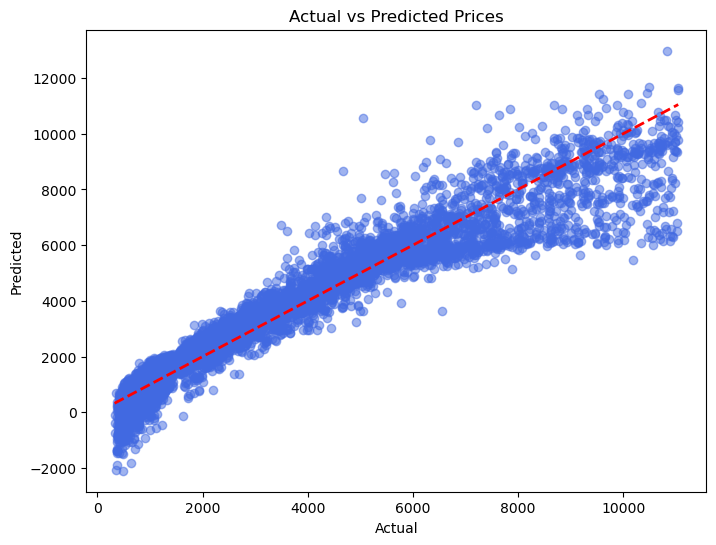

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')

#### Model fit 93% of variances

### Regularization

In [30]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#### Ridge

In [31]:
ridge = Ridge(alpha=0.001)

ridge.fit(X_train_scale, y_train)

Ridge(alpha=0.001)

In [32]:
ridge.coef_

array([19018.45343254,  -256.70660398, -5009.2159522 ,  2916.51127528,
       -3890.94239725,   275.72755653,   443.48188063,   398.36118785,
         348.19498117,  -164.32685128,  -208.63201673,  -322.157105  ,
        -682.29730992, -1084.36225225, -1728.41393786,  3437.98129933,
        2350.12227496,  1639.07701424,  3072.26427751,  2806.96699193,
        3318.01477685,  3347.65940634])

In [33]:
y_pred = ridge.predict(X_test_scale)
y_test.head(5), y_pred[0:5]

(21681    9784
 619      2839
 3578     3420
 7639     4267
 31772     773
 Name: price, dtype: int64,
 array([7720.75644423, 3457.646052  , 3598.79798353, 4505.3983179 ,
         575.90869032]))

In [34]:
print(f"MSE = {round(MSE(y_test, y_pred), 2)}")
print(f"RMSE = {round(np.sqrt(MSE(y_test, y_pred)), 2)}")
print(f"R-Square = {round(R2(y_test, y_pred),2)}")

MSE = 497301.62
RMSE = 705.2
R-Square = 0.93


In [35]:
n = X_test.shape[0]
k = X_test.shape[1]

r2 = R2(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Adjusted R² Score:", round(adj_r2, 2))

Adjusted R² Score: 0.93


#### Lasso

In [36]:
lasso = Lasso(alpha=0.001, max_iter=10000)

lasso.fit(X_train_scale, y_train)

Lasso(alpha=0.001, max_iter=10000)

In [37]:
lasso.coef_

array([19016.82654851,  -256.57207207, -4994.53306421,  2901.43836952,
       -3888.3684156 ,   275.31856273,   443.12042994,   397.85221518,
         347.87093667,  -164.27638994,  -208.58254322,  -322.10153811,
        -682.24067557, -1084.27680658, -1728.30852469,  3437.44022321,
        2349.55294119,  1638.50793632,  3071.70793732,  2806.4039338 ,
        3317.46682654,  3347.11568948])

In [38]:
y_pred = lasso.predict(X_test_scale)
y_test.head(5), y_pred[0:5]

(21681    9784
 619      2839
 3578     3420
 7639     4267
 31772     773
 Name: price, dtype: int64,
 array([7720.83577093, 3457.8948616 , 3598.67799942, 4505.35040952,
         575.9484656 ]))

In [39]:
print(f"MSE = {round(MSE(y_test, y_pred), 2)}")
print(f"RMSE = {round(np.sqrt(MSE(y_test, y_pred)), 2)}")
print(f"R-Square = {round(R2(y_test, y_pred),2)}")

MSE = 497308.65
RMSE = 705.2
R-Square = 0.93


In [40]:
n = X_test.shape[0]
k = X_test.shape[1]

r2 = R2(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Adjusted R² Score:", round(adj_r2, 2))

Adjusted R² Score: 0.93


#### ElasticNet

In [41]:
EN = ElasticNet(alpha=0.001, l1_ratio=0.8)

EN.fit(X_train_scale, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.8)

In [42]:
EN.coef_

array([15390.99508663,  -182.19118183, -1092.64467449,   483.65718711,
       -1431.43016486,   301.1154195 ,   477.16406459,   414.73315003,
         395.33505814,  -157.26076584,  -206.50561501,  -307.22341164,
        -644.765963  , -1024.09415272, -1635.09774329,  3051.05921837,
        1934.27871667,  1243.65611418,  2664.20182079,  2401.29107233,
        2933.96737908,  2959.18707663])

In [43]:
y_pred = EN.predict(X_test_scale)
y_test.head(5), y_pred[0:5]

(21681    9784
 619      2839
 3578     3420
 7639     4267
 31772     773
 Name: price, dtype: int64,
 array([7667.46795428, 3597.05072912, 3659.34865027, 4520.87779515,
         482.80932824]))

In [44]:
print(f"MSE = {round(MSE(y_test, y_pred), 2)}")
print(f"RMSE = {round(np.sqrt(MSE(y_test, y_pred)), 2)}")
print(f"R-Square = {round(R2(y_test, y_pred),2)}")

MSE = 513402.07
RMSE = 716.52
R-Square = 0.92


In [45]:
n = X_test.shape[0]
k = X_test.shape[1]

r2 = R2(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Adjusted R² Score:", round(adj_r2, 2))

Adjusted R² Score: 0.92


#### Regularization here not best idea So best model is Basic **Linear Regression** without Regularization